In [1]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import pywt
import evaluation

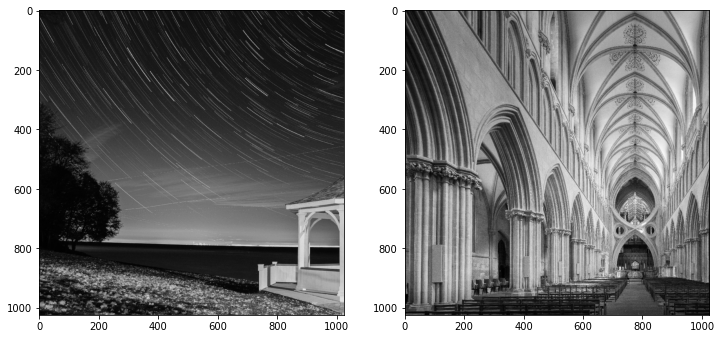

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
im = Image.open('images/cover/099902.jpg').convert('L')
cover = np.array(im)  # 2D array
secret = np.array(Image.open('images/secret/test.jpg').convert('L'))

cover = cover / 255
secret = secret / 255

axes[0].imshow(cover*255, cmap='gray', vmin=0, vmax=255)
axes[1].imshow(secret*255, cmap='gray', vmin=0, vmax=255)

plt.show()

(1024, 1024)


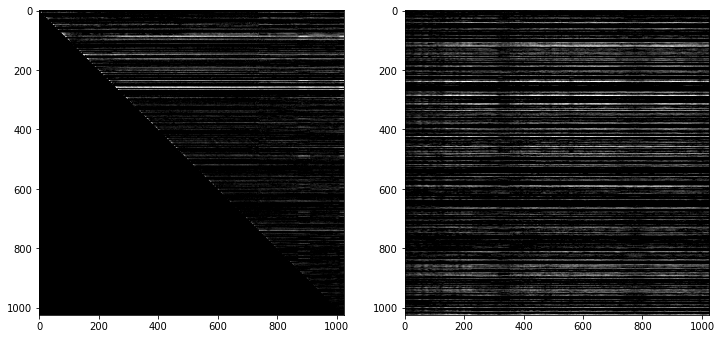

In [44]:
alpha = 0.01
wavelet = 'db1'

from scipy.stats import ortho_group  # Requires version 0.18 of scipy
m = ortho_group.rvs(dim=1024)
print(m.shape)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
qc, rc = np.linalg.qr(cover)
qs, rs = np.linalg.qr(secret)

ts = m @ secret

axes[0].imshow(rc*255, cmap='gray', vmin=0, vmax=255)
axes[1].imshow(ts*255, cmap='gray', vmin=0, vmax=255)

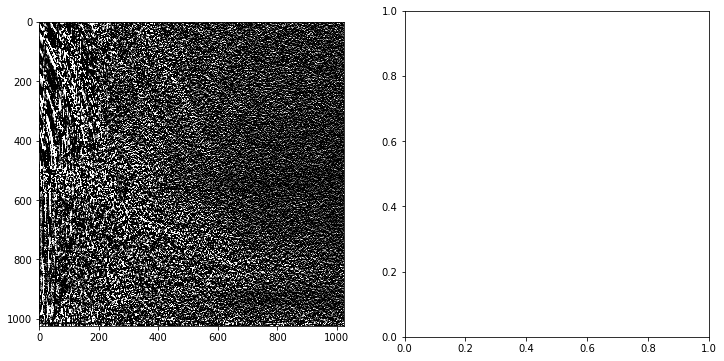

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes[0].imshow(qs*25500, cmap='gray', vmin=0, vmax=255)

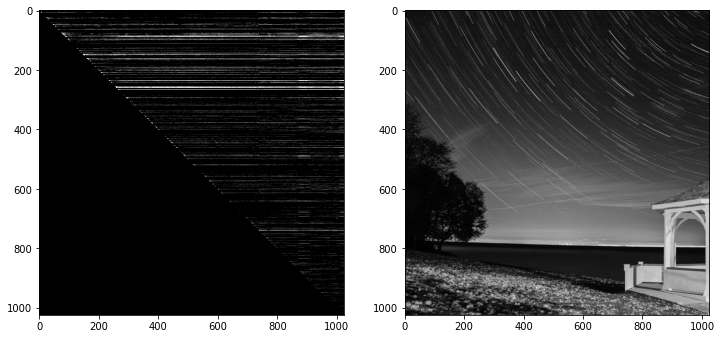

In [46]:
r_combined = rc + (alpha * ts)
stego = qc @ r_combined
    
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes[0].imshow(r_combined*255, cmap='gray', vmin=0, vmax=255)
axes[1].imshow(stego*255, cmap='gray', vmin=0, vmax=255)

Text(0.5, 1.0, 'Recovered')

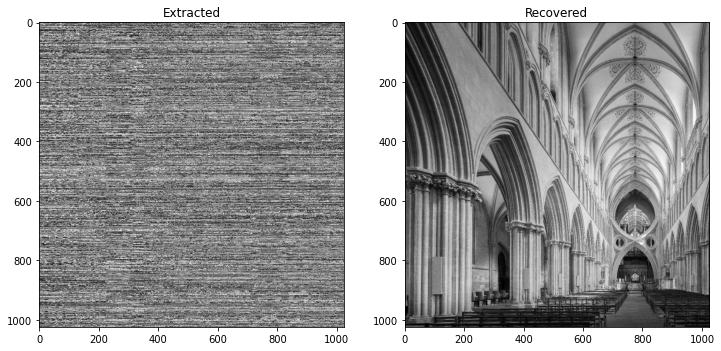

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
r1 = qc.T @ stego
ts_extracted = (r1 - rc) / alpha
recovered = m.T @ ts_extracted
axes[0].imshow(np.uint8(ts_extracted*255), cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Extracted')
axes[1].imshow(np.uint8(recovered*255), cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Recovered')

Text(0.5, 1.0, 'Recovered')

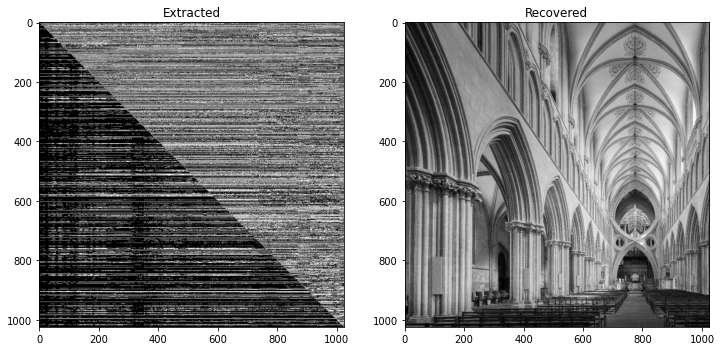

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
r1 = qc.T @ stego
ts_extracted = (r1 - rc) / alpha
recovered = m.T @ ts_extracted
axes[0].imshow(np.uint8(r1*255), cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Extracted')
axes[1].imshow(np.uint8(recovered*255), cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Recovered')

Text(0.5, 1.0, 'Recovered')

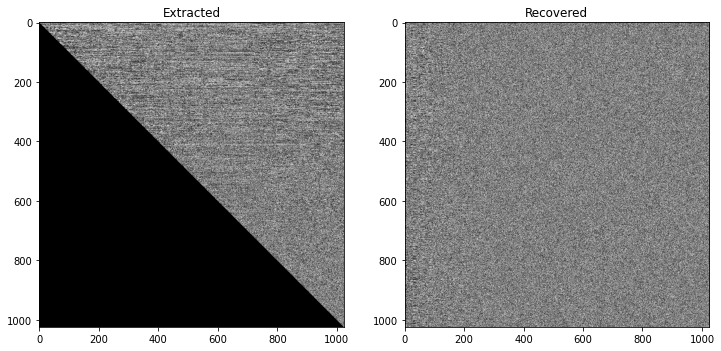

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
qsi, rsi = np.linalg.qr(stego)
r_extracted = (rsi - rc) / alpha
recovered = m @ r_extracted
axes[0].imshow(np.uint8(r_extracted*255), cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Extracted')
axes[1].imshow(np.uint8(recovered*255), cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Recovered')

In [33]:
r_extracted - ts

array([[-7.78772604e-01, -7.18193779e-01, -7.94572035e-01, ...,
        -1.23398599e+00, -1.18831032e+00, -1.21673130e+00],
       [-2.09851958e-01, -3.07691118e-01, -4.16998923e-01, ...,
        -9.68777882e-01, -9.98713327e-01, -9.85105766e-01],
       [ 1.02859030e-01,  2.02518065e-01,  3.69418775e+01, ...,
         3.00106537e+01,  2.94948146e+01,  2.99601892e+01],
       ...,
       [ 3.44838562e-01,  3.62256000e-01,  3.43085914e-01, ...,
        -3.42396961e-01, -4.38639602e-01, -3.17139671e-01],
       [-4.32796028e-01, -4.97399988e-01, -5.17401097e-01, ...,
        -3.03531174e-01, -2.09867425e-01, -3.05472668e-01],
       [-2.85542360e-01, -2.12530031e-01, -3.40629950e-01, ...,
         1.61825379e-02, -9.08890694e-03, -1.15059351e+00]])

In [16]:
from scipy.stats import ortho_group  # Requires version 0.18 of scipy
key = ortho_group.rvs(dim=1024)
print(key.shape)

(1024, 1024)


In [23]:
qc, rc = np.linalg.qr(np.fft.fft2(cover))
alpha = 0.001

In [36]:
ts = key @ np.fft.fft2(secret)
r_combined = rc + (alpha * ts)
stego_pre = qc @ r_combined

stego = np.fft.ifft2(stego_pre)
stego_untransformed = np.fft.fft2(stego)

r1 = qc.T @ stego_untransformed
print(qc.T @ qc)
#print(key.T@key)
#ts_extracted = (r1 - rc) / alpha
# print(ts_extracted - ts)

recovered = key.T @ ts_extracted
recovered = np.fft.ifft2(recovered)

[[ 7.13671693e-01+2.77555756e-17j -1.07489043e-02-2.14615470e-01j
  -5.26581214e-02-3.37649975e-01j ...  3.01391281e-04-3.25646053e-03j
  -1.11714771e-03+2.75340833e-03j -4.00214101e-03-1.55039127e-03j]
 [-1.07489043e-02-2.14615470e-01j  1.50746639e-01+1.49914349e-01j
   1.75854047e-01+7.40042845e-02j ...  1.29395810e-02+1.71374980e-02j
  -2.27991139e-03+9.89082303e-03j  3.73387210e-03+6.43351276e-03j]
 [-5.26581214e-02-3.37649975e-01j  1.75854047e-01+7.40042845e-02j
   2.29341118e-01-3.81528162e-02j ... -2.35106310e-02+9.27220797e-03j
   1.97300673e-03-3.46341749e-03j  1.57174103e-02-1.09371659e-02j]
 ...
 [ 3.01391281e-04-3.25646053e-03j  1.29395810e-02+1.71374980e-02j
  -2.35106310e-02+9.27220797e-03j ...  3.39214057e-02+7.57534234e-03j
  -1.96590958e-02+1.66354501e-02j -3.73826035e-03+1.46113445e-02j]
 [-1.11714771e-03+2.75340833e-03j -2.27991139e-03+9.89082303e-03j
   1.97300673e-03-3.46341749e-03j ... -1.96590958e-02+1.66354501e-02j
  -5.69416078e-03-1.16411869e-02j  1.32032724e-

In [11]:
i = np.fft.fft2(secret)
i - (m.T @ (m @ i))

array([[ 0.00000000e+00-5.68434189e-13j,  3.63797881e-12+0.00000000e+00j,
         9.09494702e-13-4.54747351e-13j, ...,
         0.00000000e+00+3.63797881e-12j, -3.18323146e-12+4.54747351e-13j,
         0.00000000e+00-1.45519152e-11j],
       [ 1.45519152e-11+5.45696821e-12j,  3.63797881e-12+3.63797881e-12j,
         0.00000000e+00+3.63797881e-12j, ...,
         0.00000000e+00-1.81898940e-12j,  0.00000000e+00+3.63797881e-12j,
        -5.45696821e-12+3.63797881e-12j],
       [ 2.18278728e-11+1.81898940e-12j,  0.00000000e+00-2.72848411e-12j,
         0.00000000e+00-3.18323146e-12j, ...,
        -9.09494702e-13+2.27373675e-12j,  2.72848411e-12+0.00000000e+00j,
         1.81898940e-12-1.81898940e-12j],
       ...,
       [ 4.54747351e-11-2.54658516e-11j,  5.45696821e-12+3.18323146e-12j,
         1.72803993e-11+4.09272616e-12j, ...,
        -1.13331566e-11-5.00222086e-12j, -9.54969437e-12+5.79802872e-12j,
        -2.72848411e-11+4.54747351e-12j],
       [ 0.00000000e+00-5.45696821e-12j,  4.

In [9]:
secret - np.fft.ifft2(i)

array([[ 1.11022302e-16+2.66713734e-17j,  1.24900090e-16-8.58552595e-18j,
         2.77555756e-17-5.13640779e-18j, ...,
        -1.11022302e-16-3.92091551e-17j,  5.55111512e-17-1.44876515e-17j,
         0.00000000e+00+3.22550146e-18j],
       [-5.55111512e-17+4.51028104e-17j,  0.00000000e+00+2.06201701e-17j,
        -5.55111512e-17-1.34034494e-17j, ...,
        -2.22044605e-16+5.62311292e-17j,  5.55111512e-17+1.25360876e-17j,
         1.11022302e-16-2.72947897e-17j],
       [ 5.55111512e-17+5.59448321e-17j,  1.11022302e-16+1.54837623e-17j,
        -1.52655666e-16+2.90159606e-17j, ...,
         0.00000000e+00+5.89365525e-18j, -1.11022302e-16+2.10064171e-18j,
         2.22044605e-16-6.47539748e-17j],
       ...,
       [ 0.00000000e+00+2.05998413e-17j,  2.77555756e-17-2.24226562e-17j,
         0.00000000e+00-3.05338437e-17j, ...,
         2.77555756e-17-2.67374420e-17j, -8.32667268e-17-9.51251881e-17j,
         1.24900090e-16-6.63260679e-17j],
       [ 0.00000000e+00+1.82688066e-17j, -5.